In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/code/data/train/subtask_1/en/')
#os.chdir('/content/drive/My Drive/Colab Notebooks/code/data/test/subtask_1/en/')
#os.chdir('/content/drive/My Drive/Colab Notebooks/code/experiments/')

Mounted at /content/drive


In [2]:
%pip install lexicalrichness
%pip install pandas
%pip install numpy
%pip install
%pip install matplotlib
%pip install textacy
%pip install spacy
%pip install nltk
%pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.8/97.8 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lexicalrichness: filename=lexicalrichness-0.5.1-py3-none-any.whl size=15417 sha256=b705be6cda2c91882269b377052d0c9c78094d3f54462c442f261fa8847923d5
  Stored in directory: /root/.cache/pip/wheels/cd/ba/80/d4dabc1bf242a672ffc00226a2303a7471bb841c0872b2c212
Successfully built lexicalrichness
ERROR: You must give at least one requirement to install (see "pip help install")
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.7/210.7 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 62.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.4/320.4 kB 40.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 77.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 96.6 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from lexicalrichness import LexicalRichness
import spacy
import textacy
from textacy.text_stats import readability
from matplotlib.mlab import GaussianKDE
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
df1 = pd.read_csv("bloom1b7.csv")
df2 = pd.read_csv("human.csv")
df = pd.concat([df1, df2], ignore_index=True)
df=df.drop(df.columns[0], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   prompt  2000 non-null   object
 1   text    2000 non-null   object
 2   label   2000 non-null   int64 
 3   model   2000 non-null   object
 4   domain  2000 non-null   object
dtypes: int64(1), object(4)
memory usage: 78.2+ KB


In [ ]:
df.head()

,prompt,text,label,model,domain
0,Learn to recognize the warning signs of a migr...,Learn how you can take preventative steps that...,0,A,wiki
1,Open two 15-ounce (425 g) cans of chickpeas.,"In a large mixing bowl, combine the water and ...",0,A,wiki
2,yay it does! I LOOOOOVE,"yay it does! I LOOOOOVE this movie, and my kid...",0,A,tweets
3,A healthy BMI has been linked to increased fer...,"However, a recent metaanalysis of 13 prospecti...",0,A,wiki
4,to the other person actively so you can respon...,You need someone who is ready and willing to l...,0,A,wiki


In [ ]:
df['domain'].value_counts()

domain
tweets    711
wiki      661
legal     628
Name: count, dtype: int64

In [ ]:
df['model'].value_counts()

model
NO-MODEL    17046
F            2859
E            2843
D            2834
C            2808
A            2750
B            2705
Name: count, dtype: int64

## LexicalRichness metrics


In [ ]:
# Function to calculate lexical richness metrics for each text
def calculate_lexical_metrics(text):
    lex = LexicalRichness(text)
    if lex.words != lex.terms:  # Check if words are not all unique
        window = min(25, lex.words - 1) if lex.words > 1 else 1
        draw = min(lex.words, 42)
        return {
            'Word count': lex.words,
            '(Unique) Word count': lex.terms,
            'Type-token ratio (TTR)': lex.ttr,
            'Root type-token ratio (RTTR)': lex.rttr,
            'Corrected type-token ratio (CTTR)': lex.cttr,
            'Mean segmental type-token ratio (MSTTR)': lex.msttr(segment_window=window),
            'Measure of Textual Lexical Diversity (MTLD)': lex.mtld(threshold=0.72),
            'Hypergeometric distribution diversity (HD-D)': lex.hdd(draws=draw),
            "Herdan's lexical diversity measure": lex.Herdan,
            "Summer's lexical diversity measure": lex.Summer,
            "Dugast's lexical diversity measure": lex.Dugast,
            "Maas's lexical diversity measure": lex.Maas,
            "Yule's K": lex.yulek,
            "Yule's I": lex.yulei,
            "Herdan's Vm": lex.herdanvm,
            "Simpson's D": lex.simpsond
        }
    else:
        # If all words are unique, return None
        return None

lex_metrics_df = df['text'].apply(lambda text: pd.Series(calculate_lexical_metrics(text)))

# Concatenate the original DataFrame
df_with_lex_metrics = pd.concat([df, lex_metrics_df], axis=1)


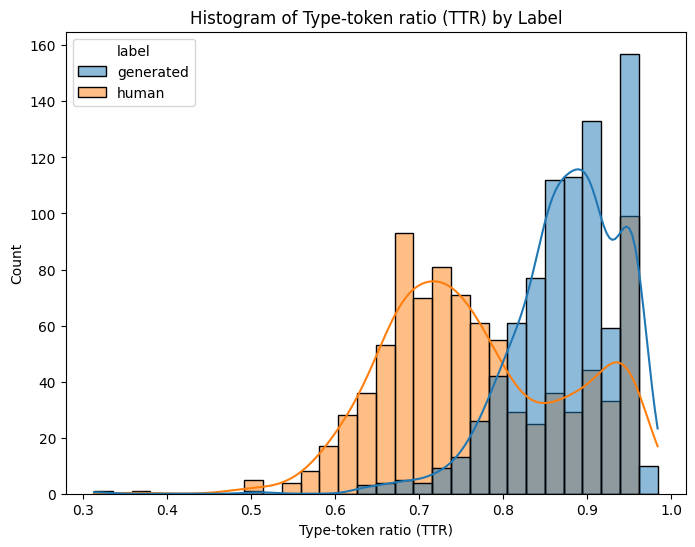

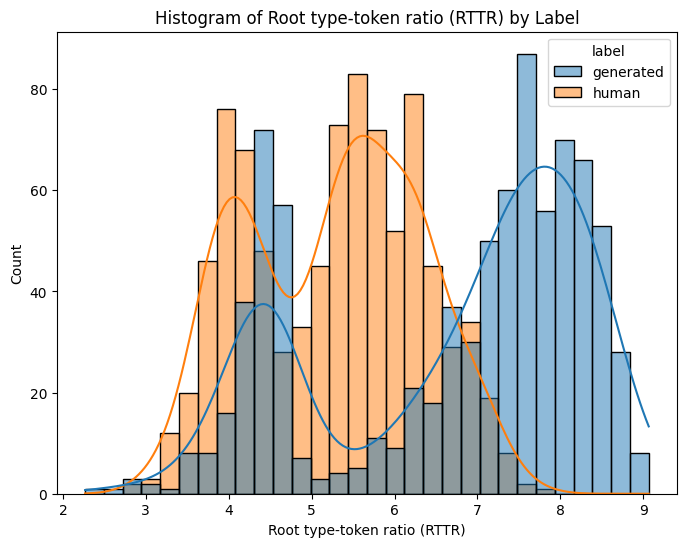

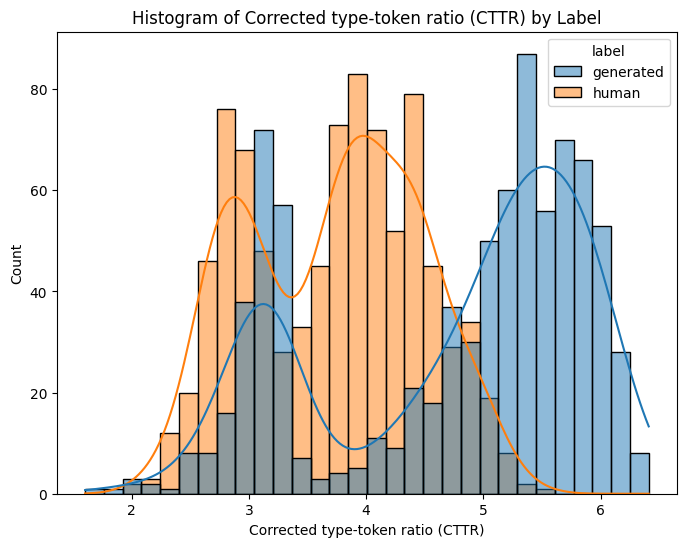

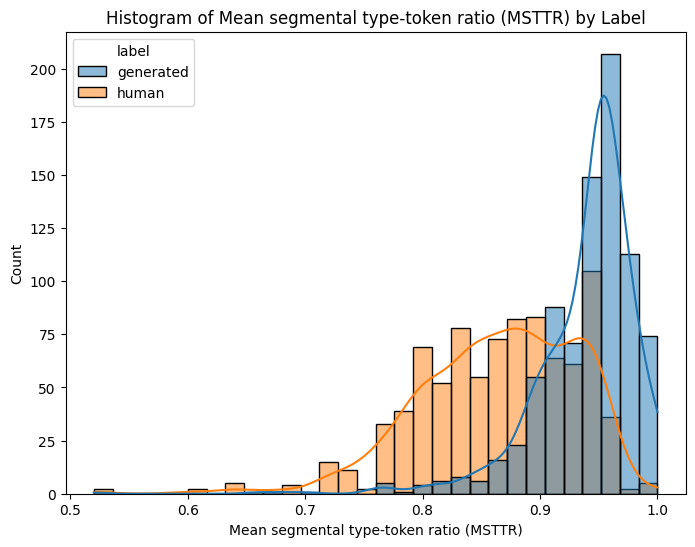

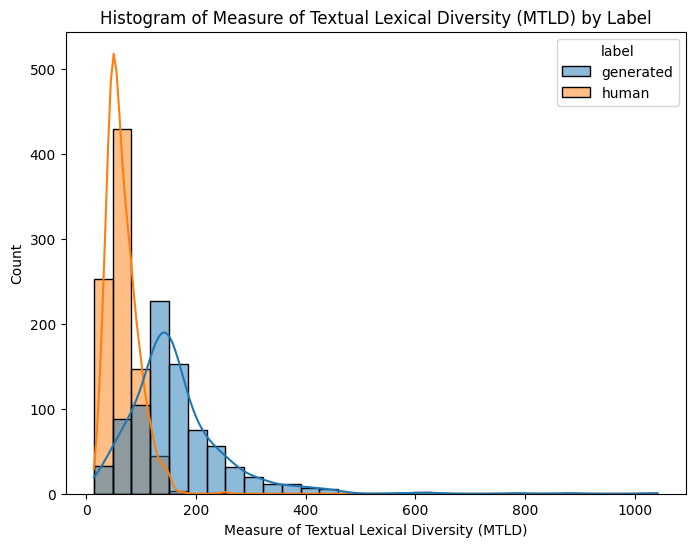

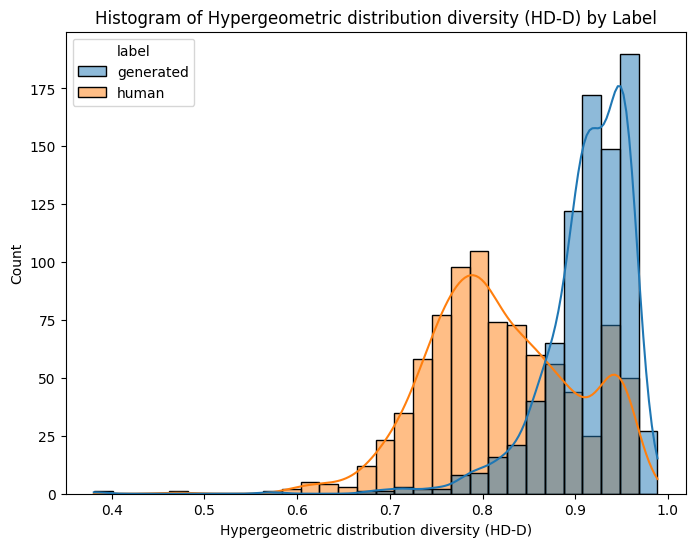

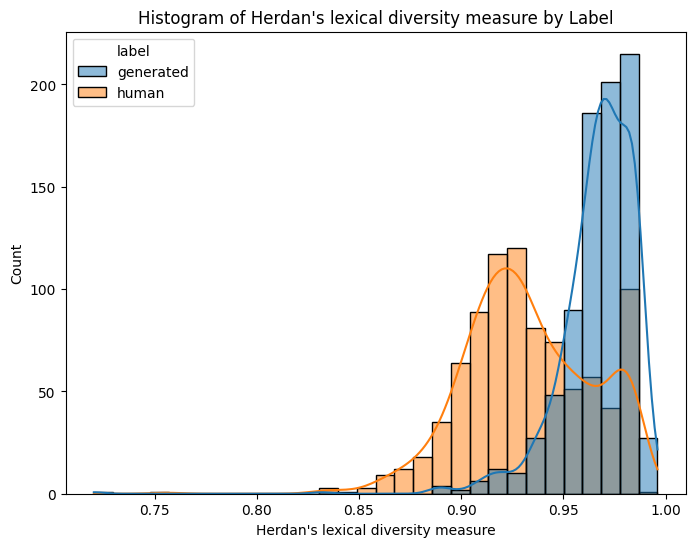

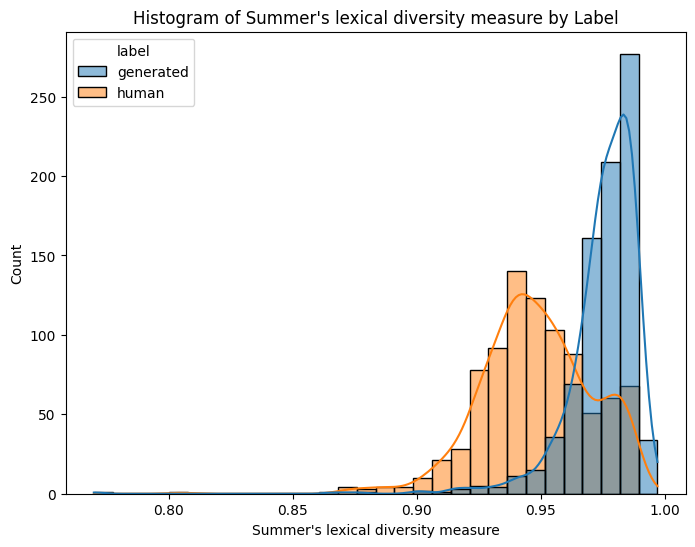

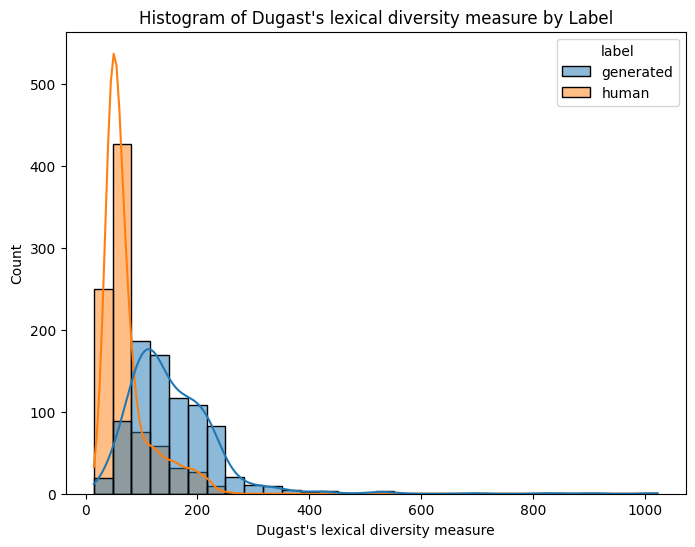

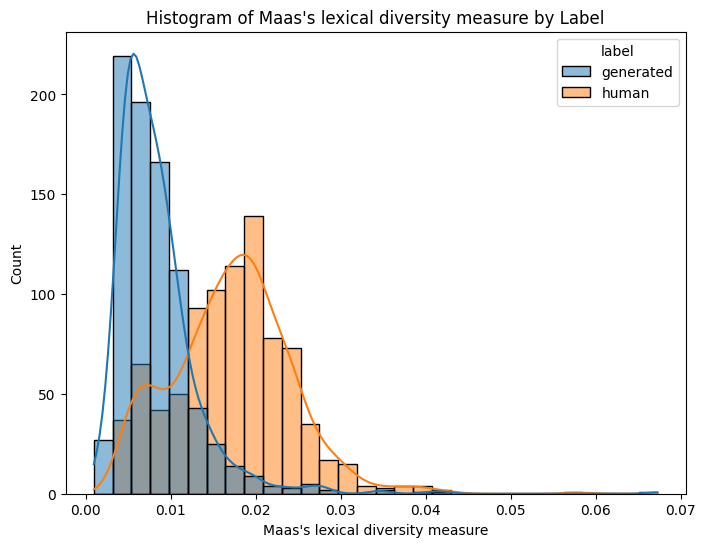

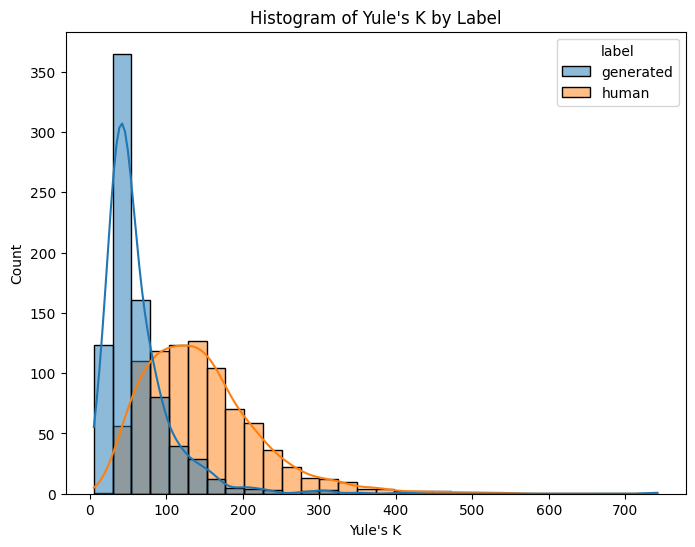

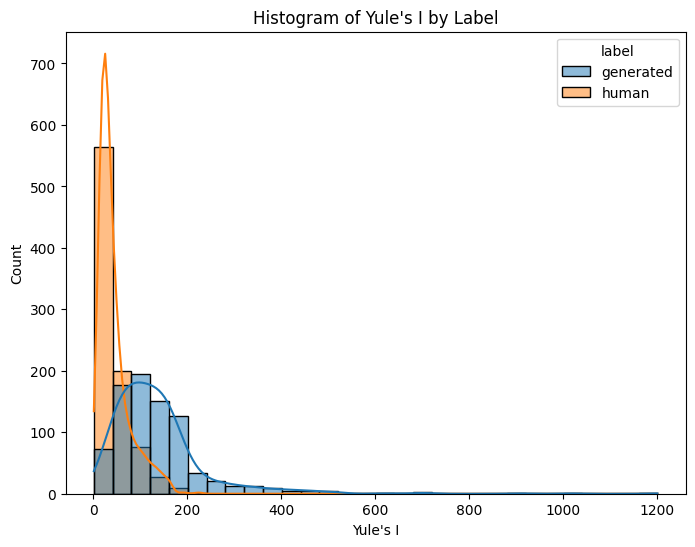

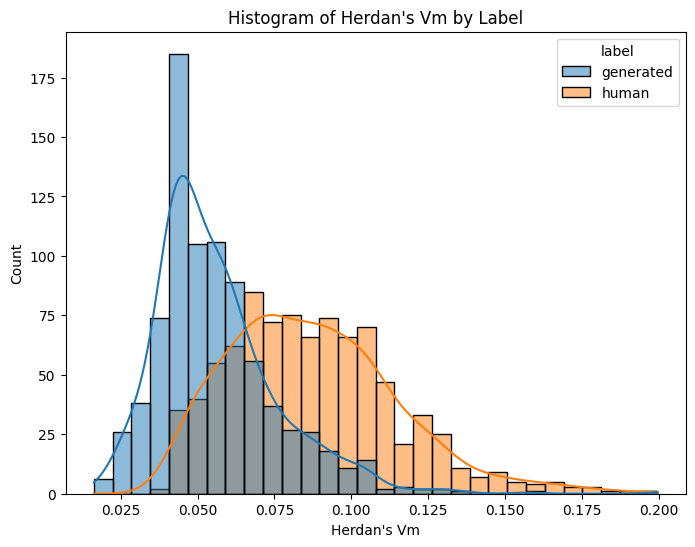

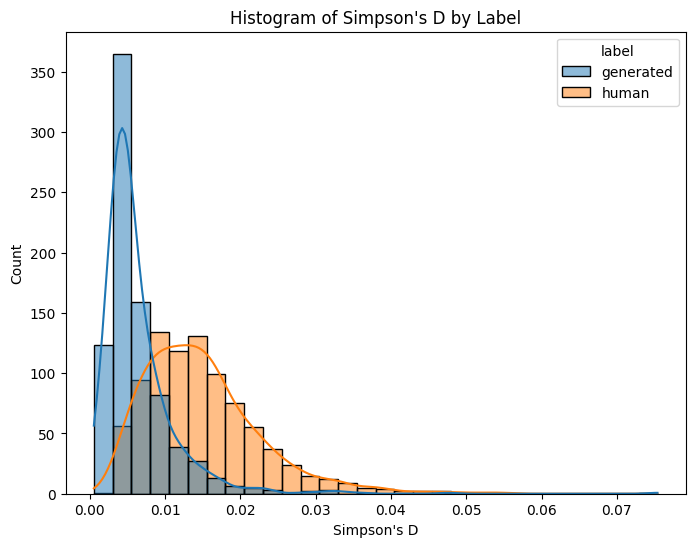

In [ ]:
lexical_richness_metrics = ['Type-token ratio (TTR)' , 'Root type-token ratio (RTTR)', 'Corrected type-token ratio (CTTR)','Mean segmental type-token ratio (MSTTR)',  'Measure of Textual Lexical Diversity (MTLD)','Hypergeometric distribution diversity (HD-D)', "Herdan's lexical diversity measure", "Summer's lexical diversity measure","Dugast's lexical diversity measure", "Maas's lexical diversity measure",  "Yule's K", "Yule's I","Herdan's Vm",  "Simpson's D" ]

for metric in lexical_richness_metrics:
    plt.figure(figsize=(8,6))
    sns.histplot(data=df_with_lex_metrics, x=metric, hue='label', bins=30, kde=True, multiple='layer', stat='count')
    plt.title(f'Histogram of {metric} by Label')
    plt.show()

## Readability metrics

In [ ]:

model_path = "en_core_web_sm"
nlp = spacy.load(model_path)

def get_readability_stats(texts):
    stats_list = []
    for ix, article in enumerate(texts):
        doc = nlp(article)
        stats = {
            'Automated Readability Index': readability.automated_readability_index(doc),
            'Coleman-Liau Index': readability.coleman_liau_index(doc),
            'a': readability.flesch_kincaid_grade_level(doc),
            'Flesch Readability Ease': readability.flesch_reading_ease(doc),
            'Gunning Fog Index': readability.gunning_fog_index(doc),
            'N Characters': len(doc.text),
            'N Unique Words': len(set(token.text.lower() for token in doc if token.is_alpha)),
            'N Words': len(doc),
            'SMOG Index': readability.smog_index(doc)
        }
        stats_list.append(stats)
    return pd.DataFrame(stats_list)

readability_stats = get_readability_stats(df['text'])
df = pd.concat([df.reset_index(drop=True), readability_stats.reset_index(drop=True)], axis=1)


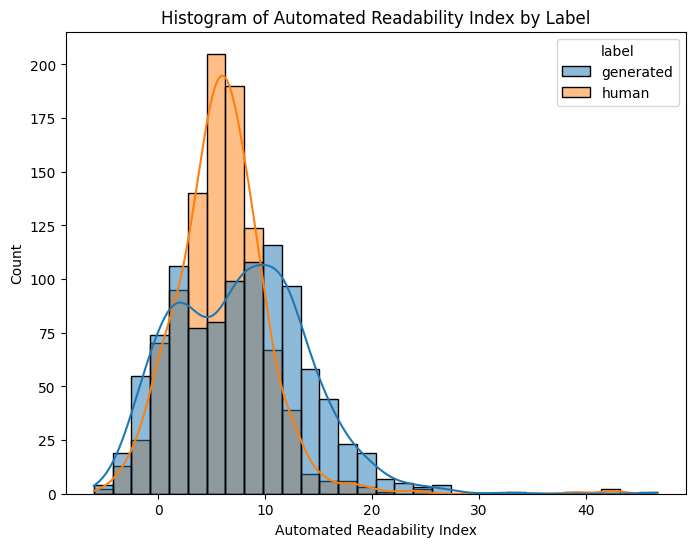

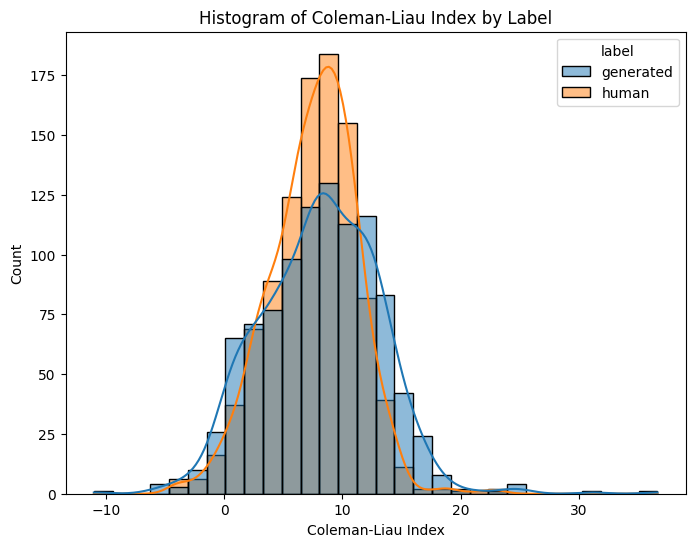

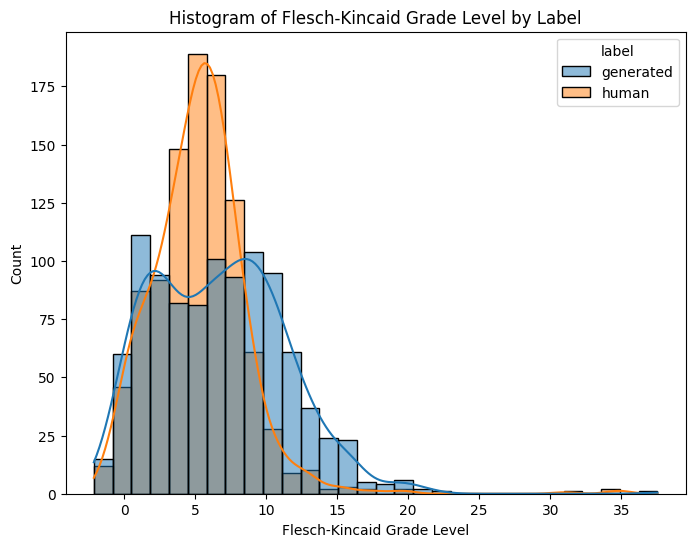

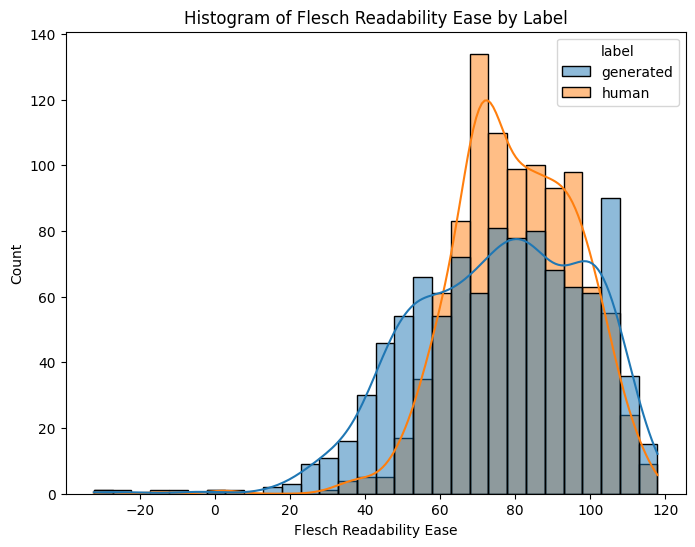

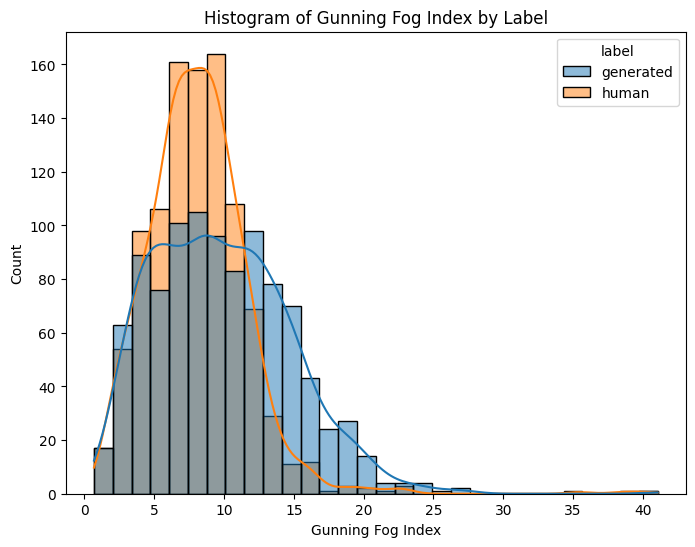

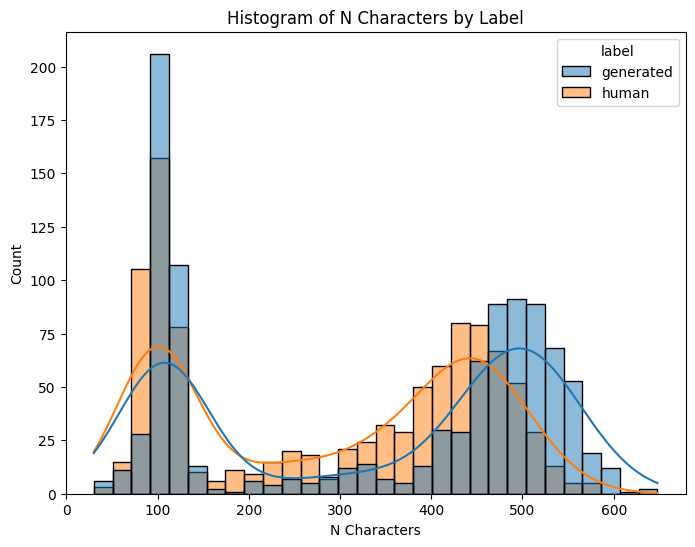

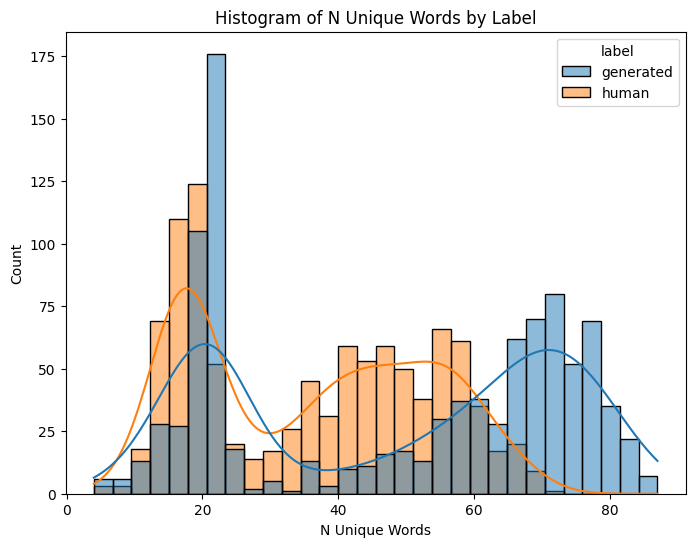

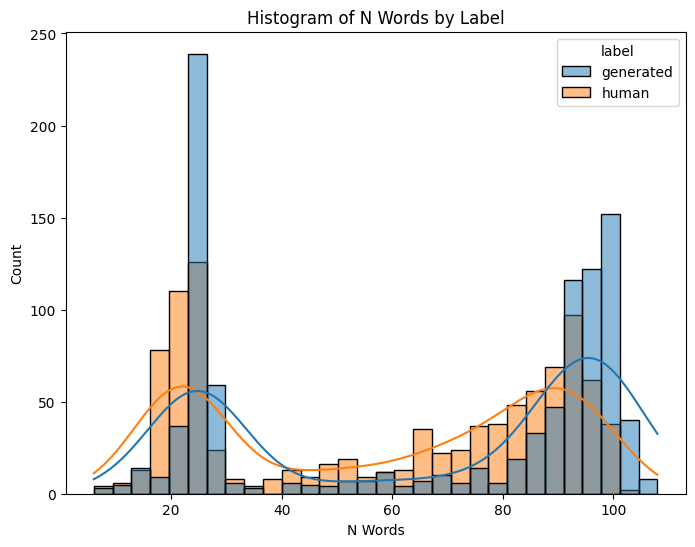

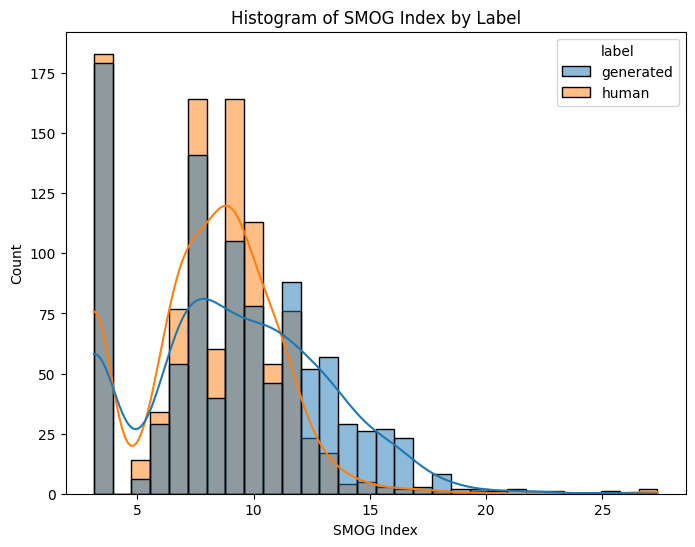

In [ ]:
readability_metrics = ['Automated Readability Index', 'Coleman-Liau Index', 'Flesch-Kincaid Grade Level',
                       'Flesch Readability Ease', 'Gunning Fog Index', 'N Characters',
                       'N Unique Words', 'N Words', 'SMOG Index']
# Plots for each metric
for metric in readability_metrics:
    plt.figure(figsize=(8,6))
    sns.histplot(data=df, x=metric, hue='label', bins=30, kde=True, multiple='layer')
    plt.title(f'Histogram of {metric} by Label')
    plt.show()

### Stylistic features

In [ ]:
nlp = spacy.load("en_core_web_sm")

def count_clauses(text):
    doc = nlp(text)
    return sum(1 for token in doc if token.dep_ == 'ROOT')

# Apply spaCy to the entire df
docs = list(nlp.pipe(df['text']))

# Initialize lists to store calculated values
n_tokens_list = []
n_sentences_list = []
n_clauses_list = []
avg_sentence_length_list = []

# Iterate over each document to calculate metrics
for doc in docs:
    n_tokens = len(doc)
    n_sentences = len(list(doc.sents))
    n_clauses = count_clauses(doc.text)
    avg_sentence_length = n_tokens / n_sentences

    # Append calculated values to respective lists
    n_tokens_list.append(n_tokens)
    n_sentences_list.append(n_sentences)
    n_clauses_list.append(n_clauses)
    avg_sentence_length_list.append(avg_sentence_length)

# Add calculated metrics to the dataframe
df['N Tokens'] = n_tokens_list
df['N Sentences'] = n_sentences_list
df['N Clauses'] = n_clauses_list
df['Avg Sentence Length'] = avg_sentence_length_list


/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


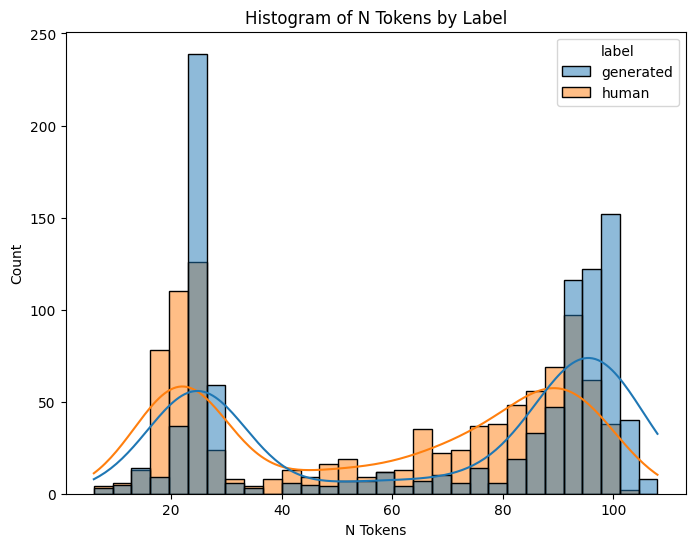

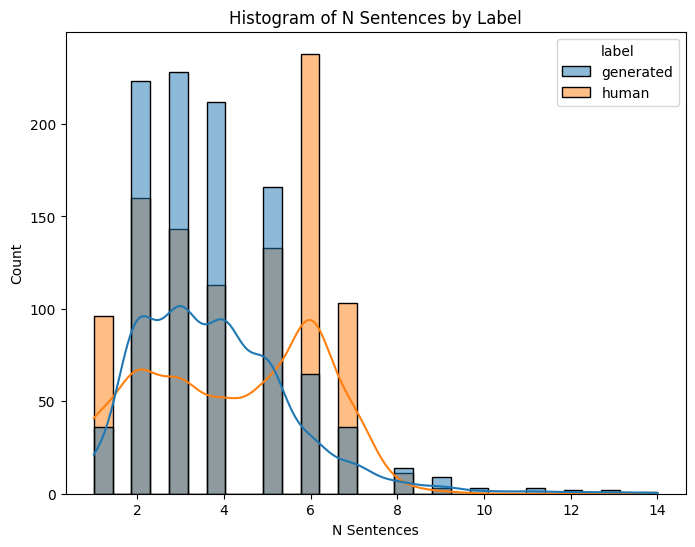

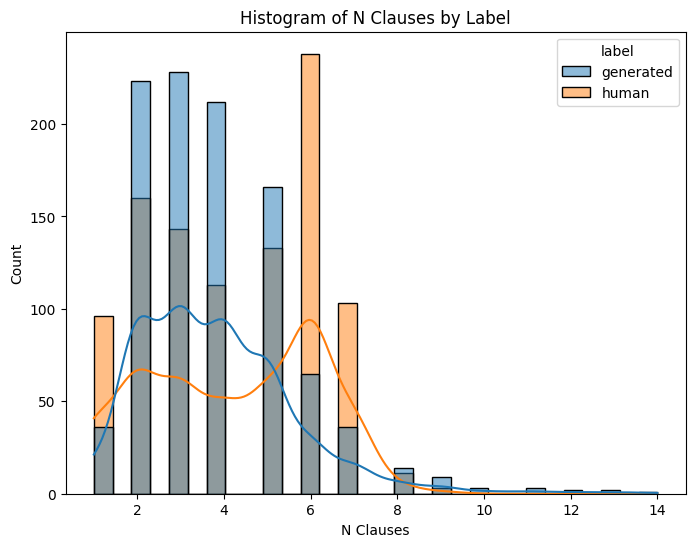

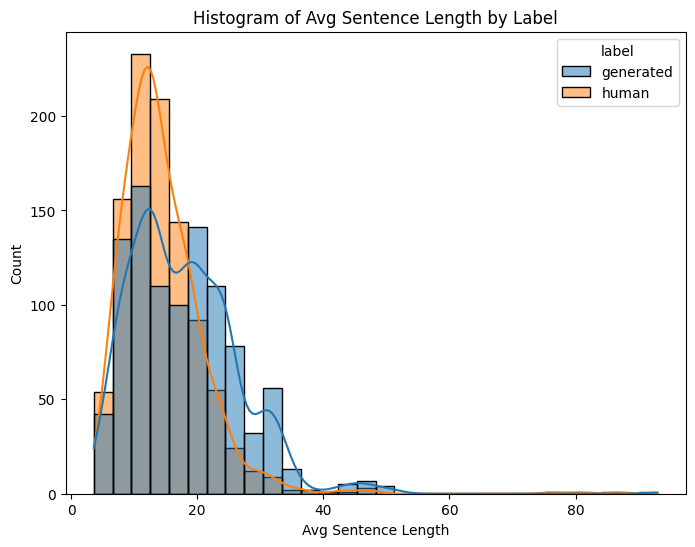

In [ ]:
metrics = ['N Tokens', 'N Sentences', 'N Clauses', 'Avg Sentence Length']

for metric in metrics:
    plt.figure(figsize=(8,6))
    # x='value', hue='category'
    sns.histplot(data=df, x=metric, hue='label', bins=30, kde=True, multiple='layer')
    plt.title(f'Histogram of {metric} by Label')
    plt.show()

## Most frequent N-grams
https://www.kaggle.com/code/harshsingh2209/complete-guide-to-eda-on-text-data

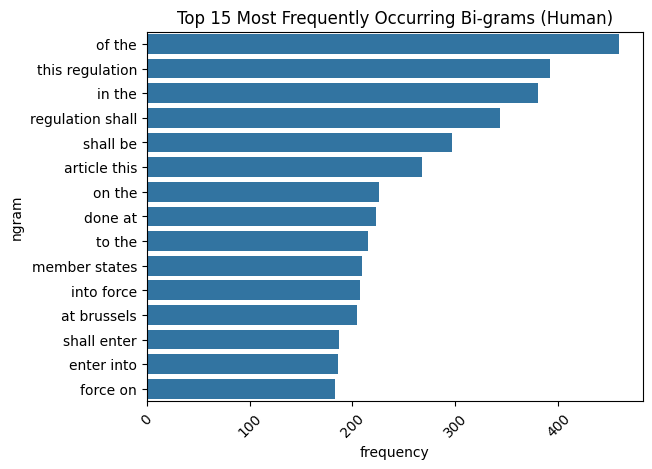

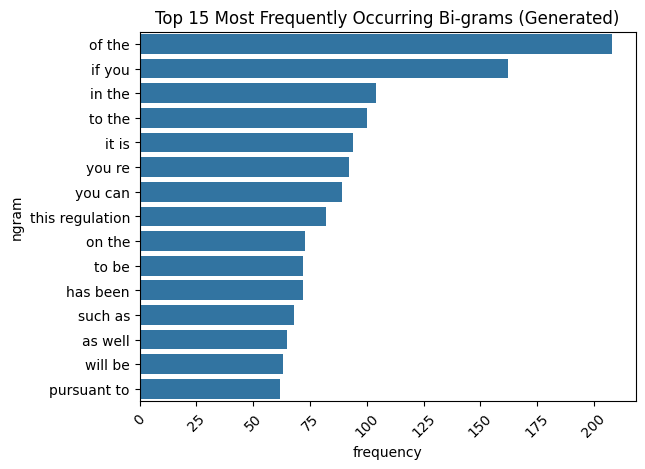

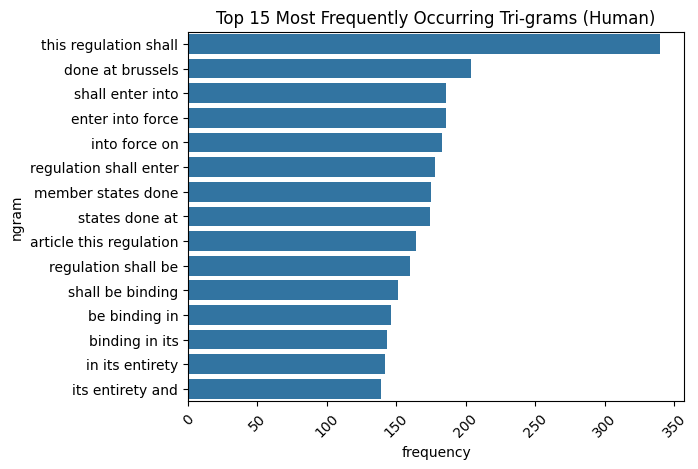

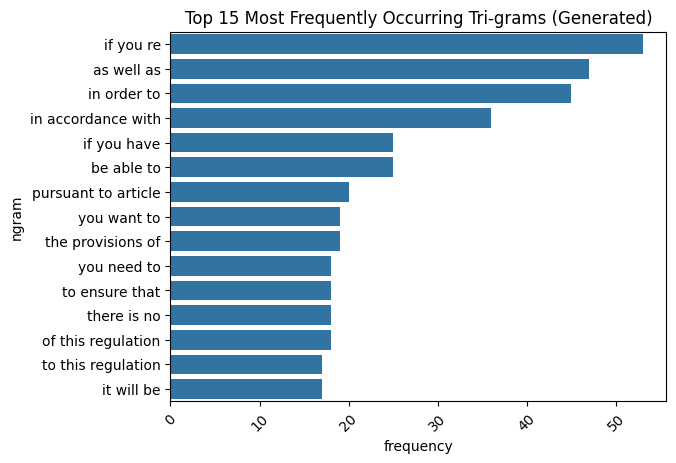

In [ ]:

# Splitting DataFrame based on label
human_df = df[df['label'] == 'human']
generated_df = df[df['label'] == 'generated']

# Function to plot n-gram frequencies
def plot_ngram_frequencies(data, ngram_range=(2, 2), top_n=15, title=''):
    cv = CountVectorizer(ngram_range=ngram_range)
    ngrams = cv.fit_transform(data)
    count_values = ngrams.toarray().sum(axis=0)
    ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse=True))
    ngram_freq.columns = ["frequency", "ngram"]
    sns.barplot(x=ngram_freq['frequency'][:top_n], y=ngram_freq['ngram'][:top_n])
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

# Bi-grams
plot_ngram_frequencies(human_df['text'], title='Top 15 Most Frequently Occurring Bi-grams (Human)')
plot_ngram_frequencies(generated_df['text'], title='Top 15 Most Frequently Occurring Bi-grams (Generated)')

# Tri-grams
plot_ngram_frequencies(human_df['text'], ngram_range=(3, 3), title='Top 15 Most Frequently Occurring Tri-grams (Human)')
plot_ngram_frequencies(generated_df['text'], ngram_range=(3, 3), title='Top 15 Most Frequently Occurring Tri-grams (Generated)')


## Morphological information

In [ ]:
df1 = pd.read_csv("bloom1b7.csv")
df2 = pd.read_csv("human.csv")
df3 = pd.read_csv("bloom3b.csv")
df4 = pd.read_csv("gpt.csv")

df = pd.concat([df1, df2, df3,df4], ignore_index=True)
df=df.drop(df.columns[0], axis=1)

In [ ]:
df['model'].value_counts()

model
A                1000
NO-MODEL         1000
B                1000
gpt-3.5-turbo    1000
Name: count, dtype: int64

In [ ]:
nlp = spacy.load("en_core_web_sm")


def extract_morphological_info(text):
    doc = nlp(text)
    morph_info = {
        "text": text,
        "pos_tags": [token.pos_ for token in doc],
        "verb_tenses": [token.tag_ for token in doc if token.pos_ == "VERB"],

    }
    return morph_info

human_morph_info = []
bloom1B_morph_info = []
bloom3B_morph_info = []
gpt_morph_info = []

for index, row in df.iterrows():
    text = row["text"]
    #label = row["label"]
    model = row['model']
    morph_info = extract_morphological_info(text)

    if model == "NO-MODEL":
        human_morph_info.append(morph_info)
    elif model == "A":
        bloom1B_morph_info.append(morph_info)
    elif model == "B":
        bloom3B_morph_info.append(morph_info)
    else:
        gpt_morph_info.append(morph_info)

# Convert the extracted information into dataframes
human_morph_df = pd.DataFrame(human_morph_info)
bloom1B_morph_df = pd.DataFrame(bloom1B_morph_info)
bloom3B_morph_df = pd.DataFrame(bloom3B_morph_info)
gpt_morph_df = pd.DataFrame(gpt_morph_info)

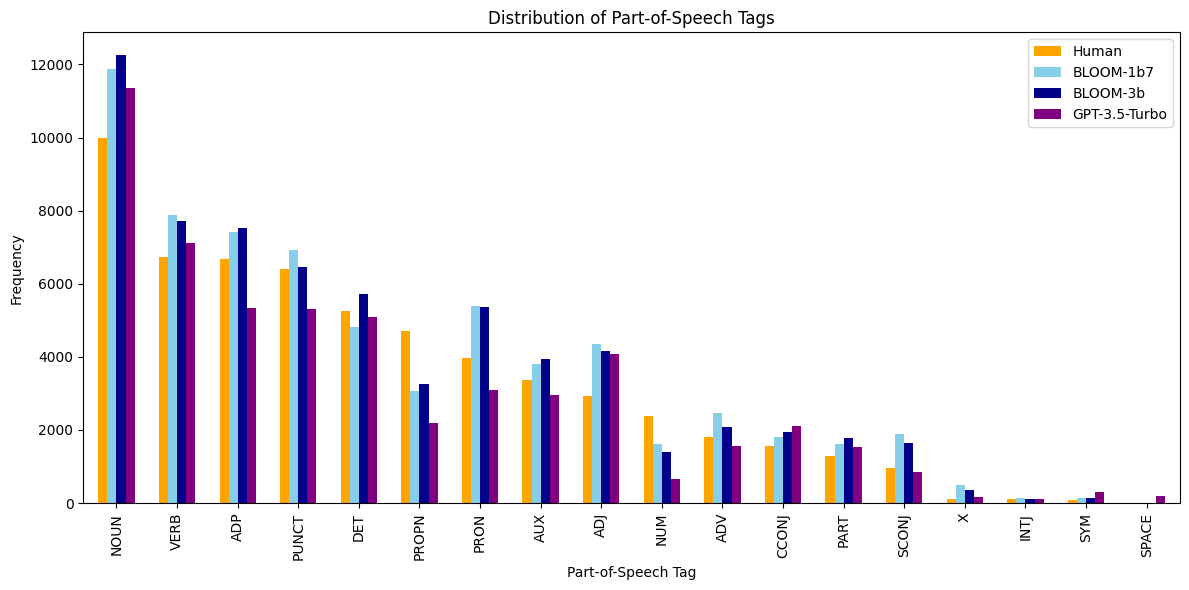

In [ ]:
# Extract POS counts for all classes
human_pos_counts = human_morph_df["pos_tags"].explode().value_counts()
bloom1B_pos_counts = bloom1B_morph_df["pos_tags"].explode().value_counts()
bloom3B_pos_counts = bloom3B_morph_df["pos_tags"].explode().value_counts()
gpt_pos_counts = gpt_morph_df["pos_tags"].explode().value_counts()

# Concatenate the poscounts for all classes
combined_pos_counts = pd.concat([human_pos_counts, bloom1B_pos_counts, bloom3B_pos_counts, gpt_pos_counts], axis=1)
combined_pos_counts.columns = ['Human', 'BLOOM-1b7', 'BLOOM-3b', 'GPT-3.5-Turbo']

# Plot
combined_pos_counts.plot(kind='bar', figsize=(12, 6), color=['orange', 'skyblue', 'darkblue', 'purple'], width=0.6)
plt.title("Distribution of Part-of-Speech Tags")
plt.xlabel("Part-of-Speech Tag")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
human_pos_counts

pos_tags
NOUN     9989
VERB     6725
ADP      6665
PUNCT    6402
DET      5243
PROPN    4718
PRON     3974
AUX      3356
ADJ      2938
NUM      2392
ADV      1805
CCONJ    1575
PART     1285
SCONJ     970
X         103
INTJ      101
SYM        92
Name: count, dtype: int64

In [ ]:
generated_pos_counts

pos_tags
NOUN     11879
VERB      7891
ADP       7413
PUNCT     6914
PRON      5393
DET       4816
ADJ       4356
AUX       3802
PROPN     3072
ADV       2463
SCONJ     1880
CCONJ     1811
PART      1617
NUM       1608
X          505
SYM        139
INTJ       133
Name: count, dtype: int64

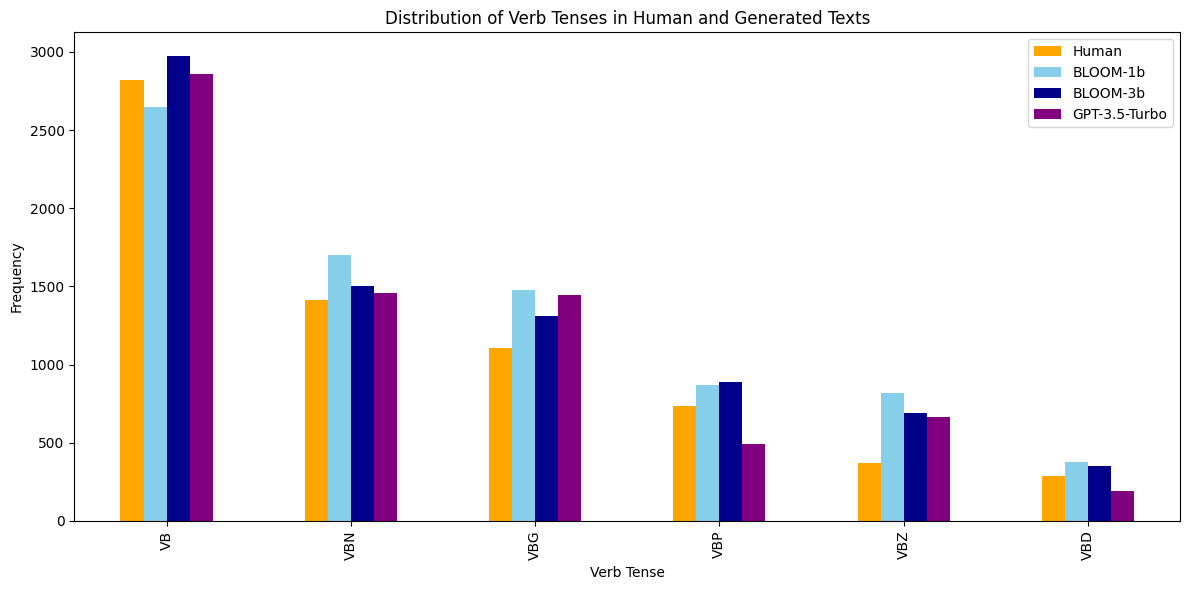

In [ ]:
# Calculate verb tense counts
human_verb_tenses_counts = human_morph_df["verb_tenses"].explode().value_counts()
BLOOM_1b_verb_tenses_counts = bloom1B_morph_df["verb_tenses"].explode().value_counts()
bloom3b_verb_tenses_counts = bloom3B_morph_df["verb_tenses"].explode().value_counts()
gpt_verb_tenses_counts = gpt_morph_df["verb_tenses"].explode().value_counts()

# Concatenate the verb tense counts for human and generated texts
combined_verb_tenses_counts = pd.concat([human_verb_tenses_counts, BLOOM_1b_verb_tenses_counts, bloom3b_verb_tenses_counts, gpt_verb_tenses_counts], axis=1)
combined_verb_tenses_counts.columns = ['Human', 'BLOOM-1b', 'BLOOM-3b', 'GPT-3.5-Turbo']

# Plot
combined_verb_tenses_counts.plot(kind='bar', figsize=(12, 6), color=['orange', 'skyblue', 'darkblue', 'purple'])

plt.title('Distribution of Verb Tenses in Human and Generated Texts')
plt.xlabel('Verb Tense')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()
